## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook: 
  - Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de
 - Jonas Hachmeister, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, jonas_h@iup.physik.uni-bremen.de
 
Github repository: https://github.com/ac3-tr/ac3-notebooks

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

# Dataset description

**Title:** Spatial and temporal variability of broadband solar irradiance during POLARSTERN cruise PS106/1 Ice Floe Camp (June 4th-16th 2017)     

**Authors** Barrientos Velasco, Carola; Deneke, Hartwig; Macke, Andreas 

**Description** The dataset is part of the expedition PS106/1 of the Research Vessel POLARSTERN to the Arctic Ocean in 2017.
During the ice floe camp (draft period, June 4th-16th 2017) 15 pyranometer stations were deployed over the ice floe covering an area of about 1 Km². Each station measured broadband solar irradiance and temperature at 1Hz resolution.

Relative humidity was also measured, however its use it is not recommended due to technical problems of the sensors.

Each file contains level and cleanliness flag describing the status of the pyranometer dome per day. The criterion is as follows.

Cleanliness
clean =1, drops =2, frozen =3, no observation = 4

Leveling
leveled =1, partially leveled =2, unleveled =3, no observation =4

**Year** 2018       

**Institutes** Tropos, Leipzig  

**DOI** [10.1594/PANGAEA.896710](https://doi.org/10.1594/PANGAEA.896710)        

**License**    [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Contents of this notebook

This notebook provides a minimal working example of reading and plotting broadband solar irradiance data from the POLARSTERN cruise PS106/1 Ice Floe Camp (June 4th-16th 2017). The data is visualized a.) by plotting the datafield against the time b.) plotting the datafield on a spatial map.


## Import relevant modules

The following packages are needed for the execution of this notebook:
_matplotlib_, _numpy_, _cartopy_, _xarray_

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy, os
import xarray as xrcartopy
%matplotlib inline

## Pre-processing of the imported data

The list of binary NetCDF files can be downloaded via the link above and saved in the current working directory of this notebook. After checking the headersize of the ASCII file, the table can be read as a NumPy record array. The print statement checks the loaded fields in the recarray.

In [41]:
datafolder = './'
datasetlist = np.recfromtxt(os.path.join(datafolder, 'Barrientos-Velasco-etal_2018.tab'), skip_header=39, delimiter='\t', names=True, encoding='utf8')
print (datasetlist.dtype.names)

('Event', 'Latitude', 'Longitude', 'DateTime', 'Content', 'File_name', 'File_format', 'File_size_kByte', 'URL_file')


As an example we can download the first file in the collection, using a *wget* if your system supports it. If not, you can go to the link printed and downloaded manually.

In [42]:
url = datasetlist['URL_file'][0]
fname = url[url.rfind('/')+1:]
print ('Downloading ... ', url)
try:
    if not os.path.exists(os.path.join(datafolder,fname)):
        os.system('wget -O '+os.path.join(datafolder,fname)+' '+url)
        print ('Download finished')
    else:
        print ('File already there...')
except:
    print ('Could not download automatically, please try manual download!')

File already there...


### Read the downloaded NetCDF file

In [43]:
import xarray as xr
fname = url[url.rfind('/')+1:]

ds = xr.load_dataset(os.path.join(datafolder,fname))

ds

/home/jonas_h/ch4_py/lib/python3.8/site-packages/xarray/coding/variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:       (time: 86400, station: 15)
Coordinates:
  * time          (time) datetime64[ns] 2017-06-04T00:00:01 ... 2017-06-04T23...
  * station       (station) float32 24.0 25.0 26.0 30.0 ... 40.0 42.0 43.0 44.0
    lon           (time, station) float32 nan nan nan nan ... 10.76 10.77 10.76
    lat           (time, station) float32 nan nan nan nan ... 81.94 81.94 81.94
Data variables:
    calibration   (station) float32 7.87 7.53 7.61 7.7 ... 7.59 7.73 7.48 7.3
    szen          (time, station) float32 nan nan nan nan ... 75.38 75.38 75.38
    sazi          (time, station) float32 nan nan nan nan ... 10.63 10.63 10.63
    esd           (station) float32 1.015 1.015 1.015 ... 1.015 1.015 1.015
    qcflag_level  (station) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    qcflag_clean  (station) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    ghi           (time, station) float32 nan nan nan nan ... 130.8 123.8 124.7
    ta            (time, station) float32 nan nan nan nan ... 271.2 271.9 271.7
    rh            (time, station) float32 nan nan nan nan ... 70.74 70.75 70.65
    F0            (station) float32 1.361e+03 1.361e+03 ... 1.361e+03 1.361e+03
Attributes:
    conventions:     CF-1.7
    title:           TROPOS pyranometer network observations
    institution:     Leibniz Institute for Tropospheric Research (TROPOS)
    address:         Permoser Str. 15, 04318 Leipzig, Germany
    source:          TROPOS pyranometer station network
    contact_person:  Andreas Macke, mailto:andreas.macke@tropos.de
    author:          Carola Barrientos, mailto:barrientos@tropos.de
    comments:        Campaign: Arctic Amplification: Climate Relevant Atmosph...
    history:         Data processed from individual daily files
    license:         Creative Commons Attribution 4.0 International

In [44]:
par = "ghi"

pardescription = ds.variables[par].attrs["long_name"]+" ["+ds.variables[par].attrs["units"]+"]"
val = ds.variables[par].values
val = val[~np.isnan(val)]

lat = ds.variables["lat"].values
lat = lat[~np.isnan(lat)]

lon = ds.variables["lon"].values
lon = lon[~np.isnan(lon)]

## Plotting example

### Overview plot

As an overview, the data fields can be plotted against flight time. Time is converted from seconds to hours.

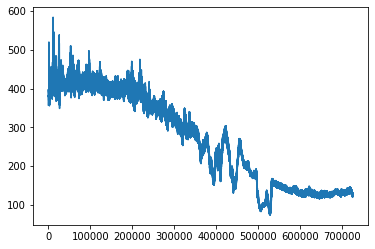

In [45]:
plt.plot(val)

## Plotting a map

Using the Cartopy module, the data can be plotted as a function of latitude and longitude. An additional Natural Earth feature of Cartopy is used to show the Svalbard landmass with a black facecolor. For each dataset a distinct plot can be made that shows the values of the corresponding data on the attached colorbar. A different colormap was chosen for the second plot to distinguish between the separat data products.

In [46]:
land10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='None', facecolor='k')
land50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='None', facecolor='k')
land110m = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='None', facecolor='k')

In [47]:
latmin, latmax = np.min(lat), np.max(lat)
lonmin, lonmax = np.min(lon), np.max(lon)

print(latmin, latmax, lonmin, lonmax)

81.92865 81.95641 10.467867 10.765324


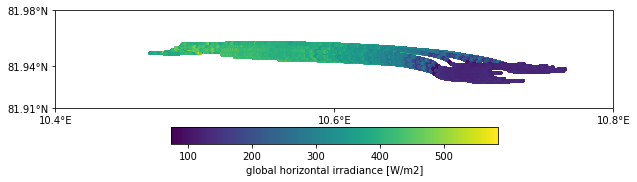

In [48]:
c = lon>1.55
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree()) #Orthographic(0, 90))
#ax1.add_feature(land50m)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
#ax1.gridlines()
#ax1.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
ax1.set_extent([10.4, 10.8, 81.91, 81.97], crs=ccrs.PlateCarree())
sc = ax1.scatter(lon[c], lat[c], s=5, c=val[c], transform=ccrs.PlateCarree())
ax1.set_xticks([10.4,10.6,10.8], crs=ccrs.PlateCarree())
ax1.set_yticks([81.91,81.94,81.98], crs=ccrs.PlateCarree())
cb = fig.colorbar(sc, ax=ax1, orientation='horizontal', fraction=0.05, pad=0.06)
cb.set_label(pardescription)
